<a href="https://colab.research.google.com/github/norliejhon/ITBAN3/blob/main/LabExercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Laboratory Exercise #2/loans.csv'

df = pd.read_csv(file_path)

df.set_index('client_id', inplace=True)

In [ ]:
#3. Display the contents of the dataset by showing its first 5 rows.
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_amount_sqrt,loan_amount_capped
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,116.927328,13672.0
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,98.964640,9794.0
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,112.845026,12734.0
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,111.883868,12518.0
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,118.528478,14049.0


In [ ]:
#4. Check the info of the dataset and the datatypes for each columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [ ]:
#5. Determine whether the dataset has missing values.
missing_values = df.isnull().sum()

print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64


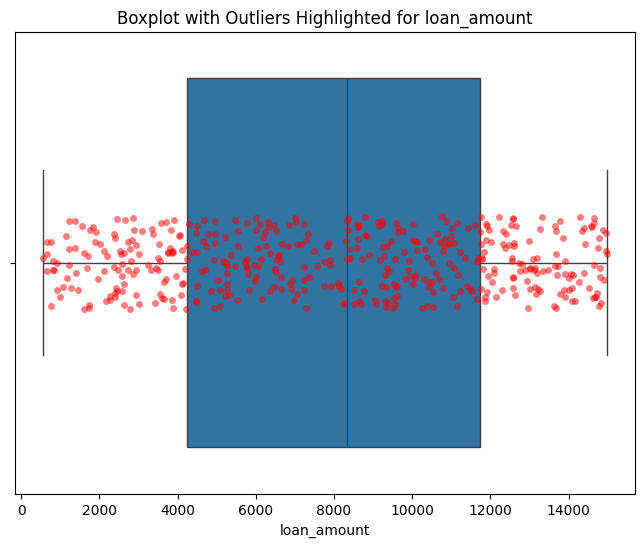

In [ ]:
#6. Check if there is a presence of outliers using Boxplot.
# Creating a boxplot with stripplot for 'loan_amount'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['loan_amount'])
sns.stripplot(x=df['loan_amount'], color="red", size=5, jitter=True, alpha=0.5)
plt.title('Boxplot with Outliers Highlighted for loan_amount')
plt.show()

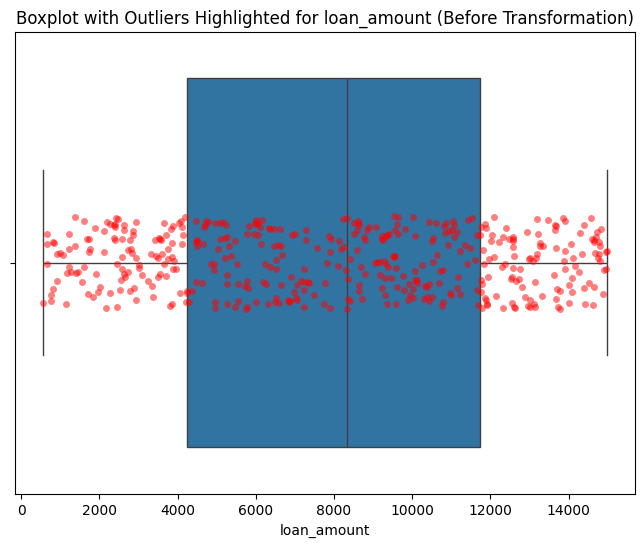

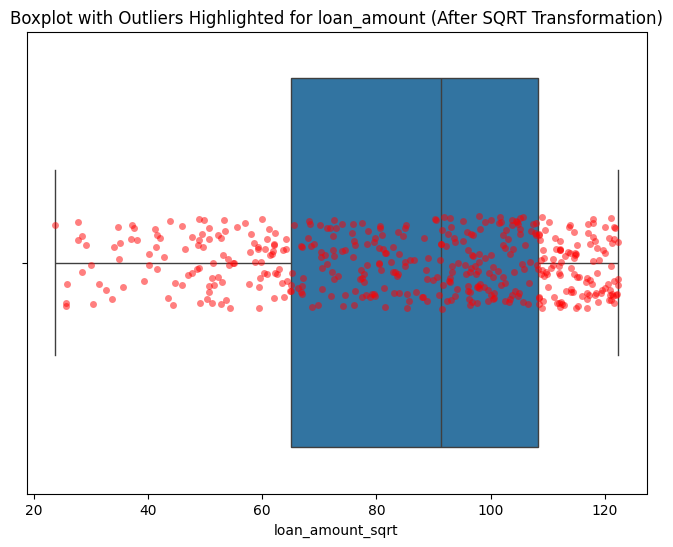

In [ ]:
#7. If there are a presence of outliers, do the following and explain the results:
#a. Treat them using SQRT transformation

# Check for outliers before transformation
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['loan_amount'])
sns.stripplot(x=df['loan_amount'], color="red", size=5, jitter=True, alpha=0.5)
plt.title('Boxplot with Outliers Highlighted for loan_amount (Before Transformation)')
plt.show()

# Treat outliers using SQRT transformation
df['loan_amount_sqrt'] = np.sqrt(df['loan_amount'])

# Check for outliers after transformation
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['loan_amount_sqrt'])
sns.stripplot(x=df['loan_amount_sqrt'], color="red", size=5, jitter=True, alpha=0.5)
plt.title('Boxplot with Outliers Highlighted for loan_amount (After SQRT Transformation)')
plt.show()

check if the spread of values has become more consistent and if extreme values have been mitigated. The transformation may help stabilize the variance, making the data more suitable for certain statistical analyses. However, it's essential to interpret the results in the context of your specific analysis and domain knowledge.

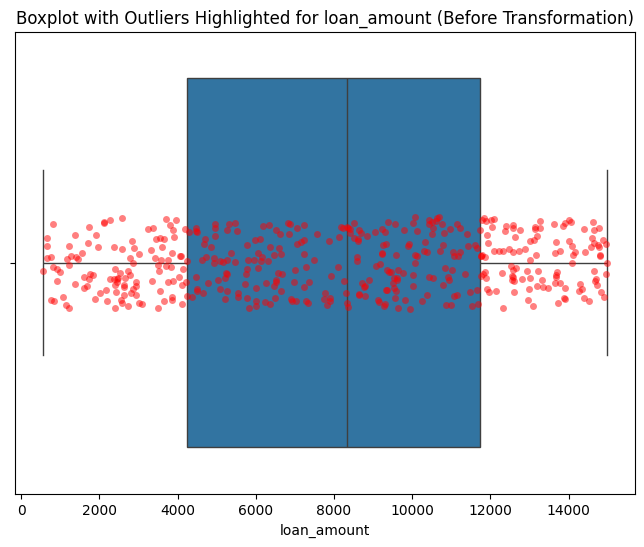

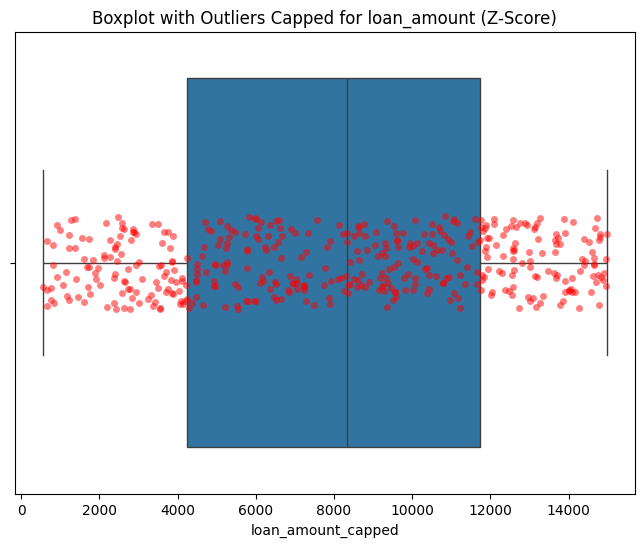

In [ ]:
#7. If there are a presence of outliers, do the following and explain the results:
#b. Treat them using the capping approach: Z-Score.
# Check for outliers before transformation
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['loan_amount'])
sns.stripplot(x=df['loan_amount'], color="red", size=5, jitter=True, alpha=0.5)
plt.title('Boxplot with Outliers Highlighted for loan_amount (Before Transformation)')
plt.show()

# Calculate Z-Scores
z_scores = zscore(df['loan_amount'])

# Define a Z-Score threshold for outliers (e.g., 3)
z_threshold = 3

# Identify and treat outliers
outliers = (np.abs(z_scores) > z_threshold)
df['loan_amount_capped'] = np.where(outliers, df['loan_amount'].median(), df['loan_amount'])

# Check for outliers after capping
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['loan_amount_capped'])
sns.stripplot(x=df['loan_amount_capped'], color="red", size=5, jitter=True, alpha=0.5)
plt.title('Boxplot with Outliers Capped for loan_amount (Z-Score)')
plt.show()

I first display the boxplot of the 'loan_amount' column before the transformation, highlighting the outliers with red dots.
Calculate the Z-Scores for each data point in the 'loan_amount' column.
Set a Z-Score threshold (e.g., 3) to identify outliers.
Replace the outliers with the median value of the 'loan_amount' column (you can choose a different strategy based on your preference).
Display the boxplot of the capped 'loan_amount' column, again highlighting the outliers.
After applying the Z-Score capping approach, check whether the spread of values has been controlled and if extreme values have been replaced or capped. Adjust the Z-Score threshold based on your data characteristics and analysis requirements.

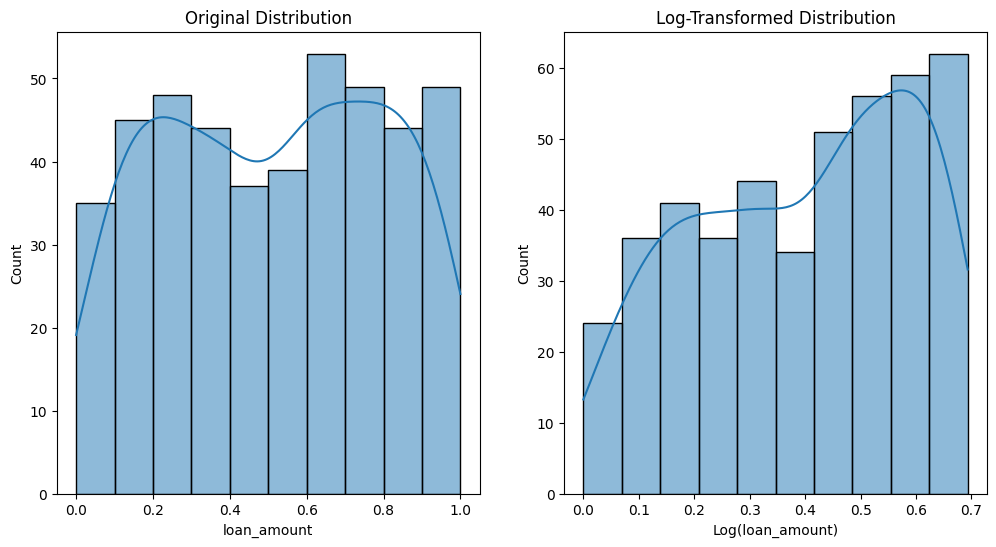

Original Skewness: -0.0400, Original Kurtosis: -1.2318
Transformed Skewness: -0.2689, Transformed Kurtosis: -1.1356


In [ ]:
#8. Upon checking the datatypes for each columns, for numerical variables, apply scaling using Min-Max Normalization.
#Display the skewness and kurtosis graphs for Loan Amount and explain the results.
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis


numeric_cols = df.select_dtypes(include=np.number).columns


scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(df['loan_amount'], kde=True)
plt.title('Original Distribution')
plt.xlabel('loan_amount')


plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['loan_amount']), kde=True)
plt.title('Log-Transformed Distribution')
plt.xlabel('Log(loan_amount)')

plt.show()

original_skewness = skew(df['loan_amount'])
original_kurtosis = kurtosis(df['loan_amount'])
transformed_skewness = skew(np.log1p(df['loan_amount']))
transformed_kurtosis = kurtosis(np.log1p(df['loan_amount']))

print(f"Original Skewness: {original_skewness:.4f}, Original Kurtosis: {original_kurtosis:.4f}")
print(f"Transformed Skewness: {transformed_skewness:.4f}, Transformed Kurtosis: {transformed_kurtosis:.4f}")

The code identifies numerical columns and applies Min-Max Normalization using MinMaxScaler from scikit-learn.
It displays the original and log-transformed distributions of the "Loan Amount" column to observe the impact on skewness and kurtosis.
Skewness and kurtosis values are calculated for both the original and transformed distributions.

In [ ]:
#9. As for the categorical features, apply encoding of categorical variables into dummy variables using pd.get_dummies approach. Show the first five (5) rows.
categorical_cols = df.select_dtypes(include='object').columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()

,loan_amount,repaid,loan_id,rate,loan_type_credit,loan_type_home,loan_type_other,loan_start_2000-03-06,loan_start_2000-03-08,loan_start_2000-03-25,...,loan_end_2016-11-14,loan_end_2016-11-27,loan_end_2016-12-10,loan_end_2016-12-29,loan_end_2017-01-16,loan_end_2017-01-19,loan_end_2017-01-26,loan_end_2017-01-29,loan_end_2017-02-15,loan_end_2017-05-07
client_id,,,,,,,,,,,,,,,,,,,,,
46109,0.909867,0.0,0.118063,0.216162,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,0.640785,0.0,0.491927,0.125253,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,0.844782,1.0,0.494955,0.067677,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,0.829795,1.0,0.296165,0.124242,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,0.936026,1.0,0.709384,0.315152,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#10. Create new derived features to calculate the tenure of the loan by using the loan_start and loan_end.
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

df['loan_tenure'] = (df['loan_end'] - df['loan_start']).dt.days

df[['loan_start', 'loan_end', 'loan_tenure']].head()

,loan_start,loan_end,loan_tenure
client_id,,,
46109,2002-04-16,2003-12-20,613
46109,2003-10-21,2005-07-17,635
46109,2006-02-01,2007-07-05,519
46109,2010-12-08,2013-05-05,879
46109,2010-07-07,2012-05-21,684


In [ ]:
#11. Split the data into training and test sets with 80-20 division.
from sklearn.model_selection import train_test_split

# Assuming 'target_column' is the column you want to predict (dependent variable)
target_column = 'loan_amount'

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (354, 8)
Shape of X_test: (89, 8)
Shape of y_train: (354,)
Shape of y_test: (89,)
